In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [2]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy']) 
history = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=40,
        validation_data=validation_generator,
        validation_steps=7178 // 64,
        shuffle=True,
        )

emotion_model.save_weights('model.h5')

Epoch 1/40
448/448 [==============================] - 231s 515ms/step - loss: 1.7963 - accuracy: 0.2601 - val_loss: 1.7119 - val_accuracy: 0.3382
Epoch 2/40
448/448 [==============================] - 201s 448ms/step - loss: 1.6239 - accuracy: 0.3682 - val_loss: 1.5350 - val_accuracy: 0.4148
Epoch 3/40
448/448 [==============================] - 195s 435ms/step - loss: 1.5278 - accuracy: 0.4097 - val_loss: 1.4556 - val_accuracy: 0.4455
Epoch 4/40
448/448 [==============================] - 195s 436ms/step - loss: 1.4528 - accuracy: 0.4431 - val_loss: 1.3818 - val_accuracy: 0.4754
Epoch 5/40
448/448 [==============================] - 198s 443ms/step - loss: 1.3932 - accuracy: 0.4698 - val_loss: 1.3387 - val_accuracy: 0.4901
Epoch 6/40
448/448 [==============================] - 201s 449ms/step - loss: 1.3471 - accuracy: 0.4873 - val_loss: 1.3111 - val_accuracy: 0.5064
Epoch 7/40
448/448 [==============================] - 201s 449ms/step - loss: 1.3036 - accuracy: 0.5058 - val_loss: 1.2761 -

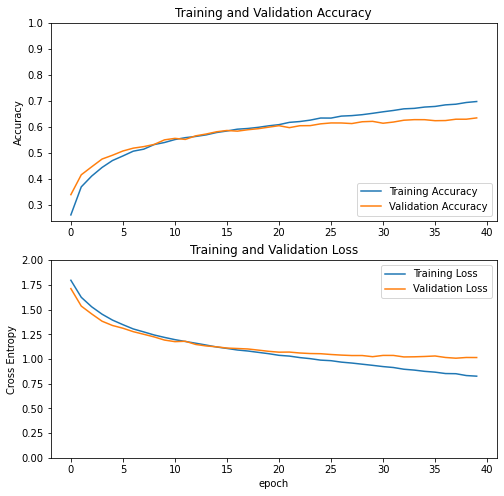

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()